# Explainable AI
Machine learning bootcamp

# **Task 1**

##**Import Library**

In [ ]:
#import library
import pandas as pd

#import sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

##**Load the Data**

In [ ]:
#reading the dataset
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


##**Perform Basic Exploratory Data Analysis**

In [ ]:
#show the types of variable
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [ ]:
#show the brief description of dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


##**Separate the Input and Target Features of the data**

In [ ]:
X_train = heart_data.drop(columns={'target'})
y_train = heart_data['target']

##**Split the data into Train and Test Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

##**Scale your data if required**

#**Task 2**

##**Logistic Regression**

###**Build a Logistic Regression Model on train set**

In [ ]:
#train the data with logistic regression
logis = LogisticRegression()
logis.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predict the data
result_logis_predict = clf_logis.predict(X_test)

###**Evaluate the model using F1 Score**

In [ ]:
#evaluate the model
print(classification_report(y_test, result_logis_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.85      0.88      0.86        25

    accuracy                           0.84        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.84      0.84      0.84        43



##**Randomforest**

In [ ]:
param_grid = {'criterion': ['entropy','gini'], 
              'n_estimators': [20, 40, 60, 80, 100], 
              'max_features': ['sqrt','log2']}
rf = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=4, cv=5, scoring = 'roc_auc')
rf.fit(X=X_train, y=y_train)
print(rf.best_score_, rf.best_params_)

0.9260879629629629 {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 20}


##**Predict the test data**

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')
print(test_data.shape)
test_data.head()

(91, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [ ]:
y_pred = rf.predict(test_data)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1])

In [ ]:
result = pd.DataFrame(y_pred)
result.index = test_data.index
result.columns = ['prediction']
result.shape

(91, 1)

In [ ]:
from google.colab import files
result.to_csv('prediction_result.csv', index=False)
files.download('prediction_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Task 3**

##**Use a SHAP Explainer to derive SHAP Values for the logistic regression model**

In [ ]:
#!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.LinearExplainer(logis, X_train)
shap_values = explainer.shap_values(X_test)
print('Expected Values',explainer.expected_value)

Expected Values 0.30566562522804197


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
#show the first five rows
pd.DataFrame(shap_values, columns=X_test.columns).head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.079104,-0.235038,1.156077,-0.267216,-0.004525,-0.043496,-0.511313,0.478201,0.431473,0.387600,0.269679,0.330143,0.326733
1,-0.021794,0.523150,1.156077,0.041704,-0.003967,0.004302,-0.511313,-1.123277,0.431473,0.387600,0.269679,0.330143,2.746981
2,0.018565,0.523150,0.159459,-0.061269,0.010086,0.004302,0.313385,0.510231,0.431473,-0.264742,0.269679,0.330143,0.326733
3,-0.263950,-0.235038,0.159459,0.505084,-0.001848,0.004302,0.313385,0.093847,0.431473,0.387600,0.269679,0.330143,0.326733
4,0.200183,-0.235038,2.152695,-1.039515,-0.002740,0.004302,-0.511313,0.157906,0.431473,0.061429,-0.304106,0.330143,-0.883390


In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
206,58,1,2,140,211,1,0,165,0,0.0,2,0,2
37,53,0,2,128,216,0,0,115,0,0.0,2,0,0
89,55,0,1,132,342,0,1,166,0,1.2,2,0,2
190,41,1,1,110,235,0,1,153,0,0.0,2,0,2
149,64,1,3,170,227,0,0,155,0,0.6,1,0,3


The above metric of **expected value is 0.305** will be used as **base value**. The value above the base value will predict the people who get heart disease (target = 1) and vice versa (target = 0)

#**Task 4**

##**Plot a SHAP force plot for the first row of test data.**

In [ ]:
y_test.head(1)

206    1
Name: target, dtype: int64

In here we get the value for the first row in test data is a person who get heart disease. Now, I will plot the force plot to see what features push this person get a heart disease
- Base value is taken by explainer.expected values
- The Shap values that I generate above are used .shape_values[0,:] means that I take the first row and all columns
- The final argument used is the first row from X_test. For instance y_test.head(1)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:],
                X_test.iloc[0,:])

SHAP is really good to give a reason why this person get a heart disease. The features in red one push the prediction to predict this person who gets a heart disease and blue one push the prediction to predict otherwise.

As you can see that the bold values **2.70** is higher than the **Base Value**. Thus, the model predict the person gets a heart disease

#**Task 5**

##**Plot a SHAP force plot for all the rows of the data**

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[:,:],X_test.iloc[:,:])

Instead of showing the plot one by one in each row. SHAP can also show multiple force plots in one chart. The default visualization in here is **sample order by similarity** which means putting the people having the most similar feature together. 

What is the insight from the chart above:
- The first 20 rows probably predict the people who have no heart disease.
- Most of the next 20+ test samples probably people who have heart disease.

#**Task 6**

##**Plot a SHAP summary plot using all the features in the data**

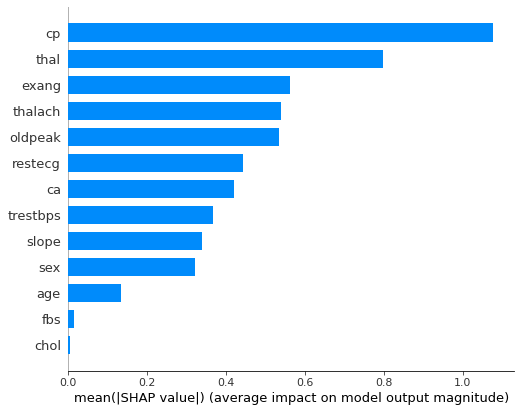

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

Based on the bar chart above, it shows that cp (chess pain type) is the most importance feature to predict the heart disease and followed by thal, exang, thalach, and oldpeak.

On the other hand, the chol and fbs are the least importance feature.

#**Task 7**

##**Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.**

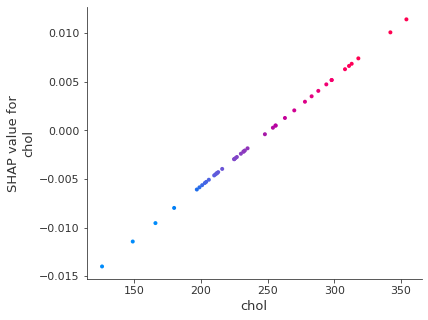

In [ ]:
shap.initjs()
shap.dependence_plot(ind='chol', interaction_index='chol', shap_values=shap_values,
                     features=X_test)

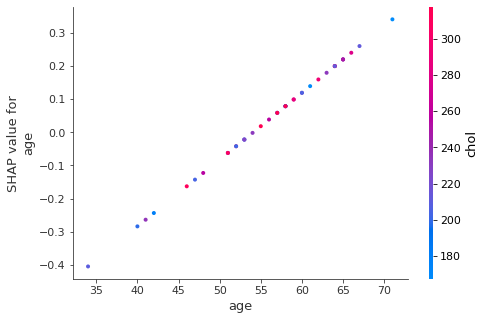

In [ ]:
shap.initjs()
shap.dependence_plot(ind='age', interaction_index='chol', shap_values=shap_values,
                     features=X_test)

The above chart shows that the age between 55 - 60 having the highest possibility to get heart disease

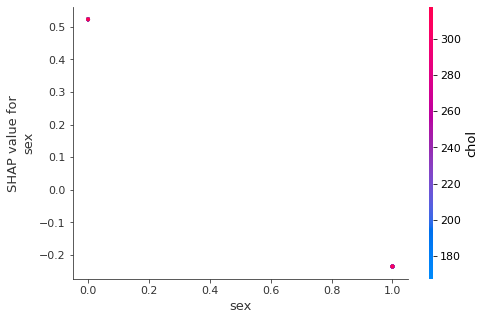

In [ ]:
shap.initjs()
shap.dependence_plot(ind='sex', interaction_index='chol', shap_values=shap_values,
                     features=X_test)

The above chart shows that female get the highest chance of heart disease with high chol. On the other hand, male get the lowest chance of having heart disease even with high chol.

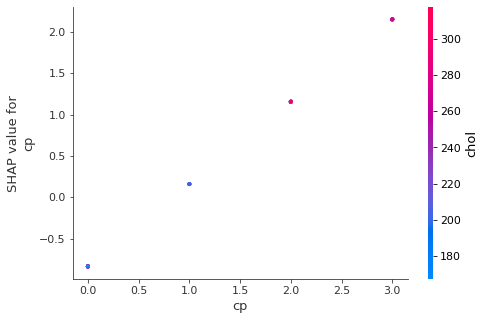

In [ ]:
shap.initjs()
shap.dependence_plot(ind='cp', interaction_index='chol', shap_values=shap_values,
                     features=X_test)

The above chart shows that chest pain type 2 and 3 have the high possibility to get heart disease with high chol.

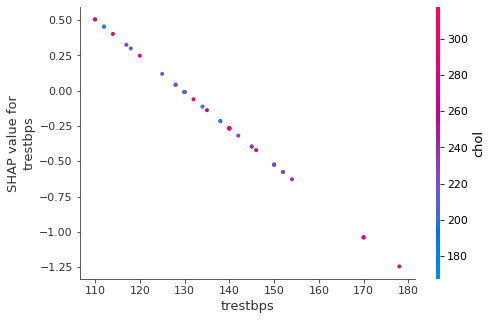

In [ ]:
shap.initjs()
shap.dependence_plot(ind='trestbps', interaction_index='chol', shap_values=shap_values,
                     features=X_test)

The above chart shows that the lower tretbps will have a chance to get heart disease even with low and high chol